<a href="https://colab.research.google.com/github/rabebbrahim/AmazonBooks/blob/main/AmazonBooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
df= pd.read_csv("bestsellers_with_categories_2022_03_27.csv", delimiter= ",")

In [7]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [8]:
df.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['Genre']=encoder.fit_transform(df['Genre'])

In [13]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,1
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,1
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,0
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,1
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 38.4+ KB


Visualization data

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


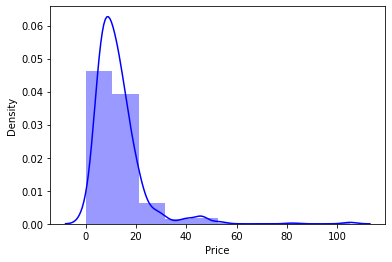

In [16]:
sns.distplot(df["Price"], bins= 10, hist= True, kde= True, color="blue")

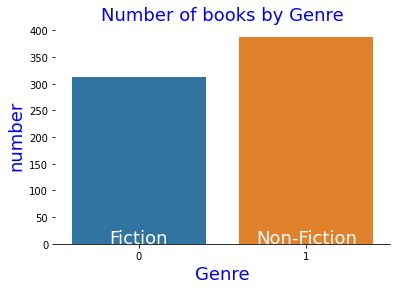

In [17]:
sns.countplot(x= "Genre", data= df)
sns.set(style="whitegrid")
plt.text(x=0, y=2, s="Fiction", color='white', fontsize=18, horizontalalignment='center')
plt.text(x=1, y=2, s="Non-Fiction", color='white', fontsize=18, horizontalalignment='center')
plt.xlabel('Genre', size=18, color='blue')
plt.ylabel("number", size=18, color='blue')
plt.title("Number of books by Genre", size=18, color='blue')
sns.despine(left=True)

In [18]:
dataset=df.groupby(['Genre', 'Year']).size().reset_index(name='counts')

[Text(0.5, 1.0, 'Number of Fiction vs Non Fiction books in Amazons top-50 list from 2009-2022')]

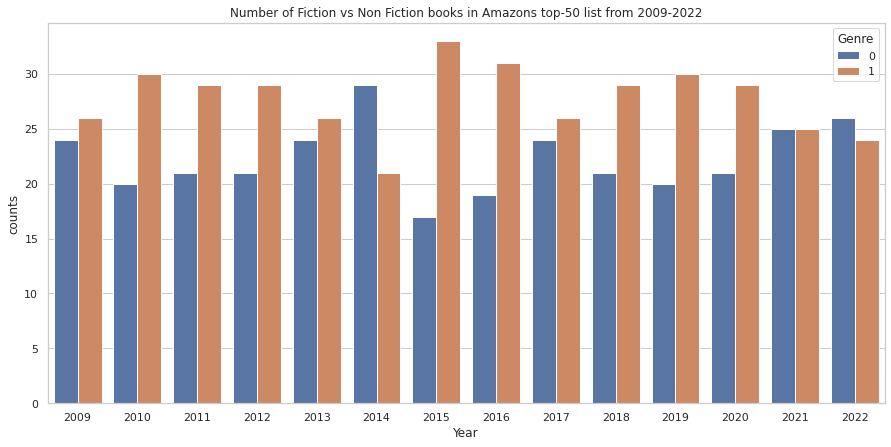

In [19]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Year', y='counts', hue='Genre', data=dataset).set(title='Number of Fiction vs Non Fiction books in Amazons top-50 list from 2009-2022')

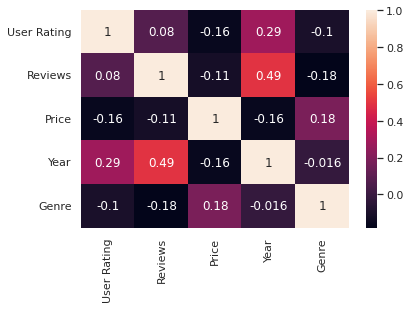

In [20]:
sns.heatmap(df.corr(), annot=True)


In [21]:
import matplotlib.pyplot as plt

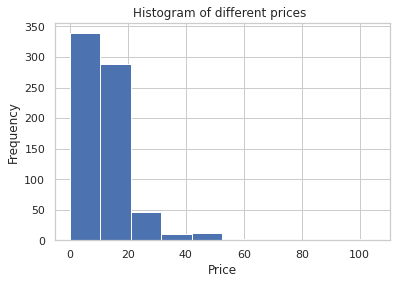

In [22]:
plt.title("Histogram of different prices ")
plt.xlabel("Price")
df['Price'].plot.hist()

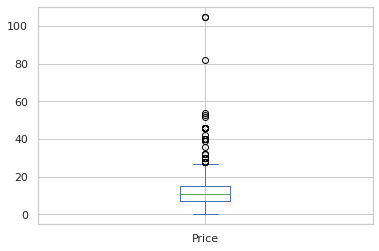

In [23]:
df['Price'].plot.box()

In [24]:
new_data=df.drop(['Name','Author','User Rating','Year','Genre'],axis=1)

In [25]:
new_data.head()

,Reviews,Price
0,5013,17
1,798,5
2,9769,13
3,1542,14
4,1541,4


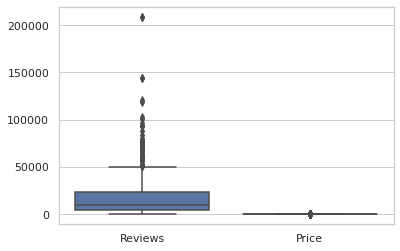

In [26]:
sns.boxplot(data=new_data)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [30]:
new_data["Reviews"]=scaler.fit_transform(new_data[["Reviews"]].values)

In [32]:
new_data["Price"]=scaler.fit_transform(new_data[["Price"]].values)

**Correlatiob** between price and Review **texte en gras**

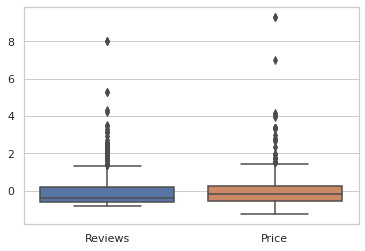

In [33]:
sns.boxplot(data=new_data)

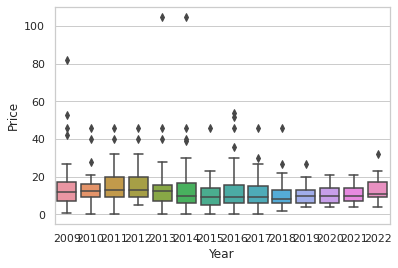

In [34]:
sns.boxplot(x= "Year", y="Price", data=df)

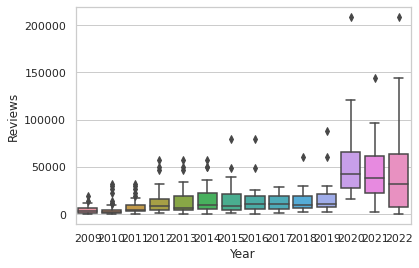

In [35]:
sns.boxplot(x= "Year", y="Reviews", data=df)

Linear Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [37]:
import numpy as np


In [52]:
x=df["Year"].values[:,np.newaxis]

In [53]:
y=df["Reviews"].values

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE",mean_squared_error(y_test,predicted))
print("R squared",metrics.r2_score(y_test,predicted))

MSE 301553612.58365625
R squared 0.32499126262641287


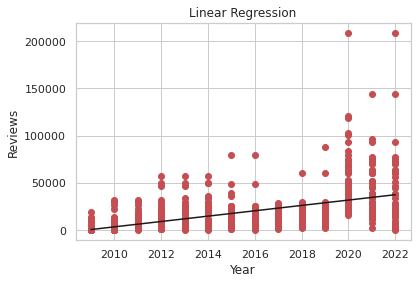

In [55]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Reviews")
plt.xlabel("Year")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [60]:
X=df[["Genre","Year", "Reviews","User Rating"]] 
Y=df["Price"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(X_train,Y_train) 
predicted=model.predict(X_test) 

print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

MSE 143.7346000321538
R squared 0.0444166823097526


In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
x1=df[["Price","Genre"]]
y1=df["Price"].values
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x1_train_fit=poly.fit_transform(x1_train)
lg.fit(x1_train_fit,y1_train)
x1_test_=poly.fit_transform(x1_test)
predicted=lg.predict(x1_test_)
print("MSE",metrics.mean_squared_error(y1_test,predicted))
print("R Squared",metrics.r2_score(y1_test,predicted))

MSE 1.4398164768456136e-22
R Squared 1.0
